### New knee plots

Lets draw some new knee plots using already formed clusterings that are saved to files

In [41]:
%pylab inline 
pylab.rcParams['figure.figsize'] = (15,12)
import numpy as np
import simplejson as json
import os
from gradutil import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
dire = os.path.join(os.getcwd(), 'clusterings')
with open(os.path.join(dire, 'dump8500all.json'), 'r') as file:
    clustering8500 = json.loads(file.read())

(This takes quite a lot of time. The file is about 1.5 Gb...)

The json format in the middle loses the integer types from the keys of the dictionary, so they need to be reassigned

In [8]:
new_clustering8500 = dict()
for nclust in clustering8500.keys():
    new_clustering8500[eval(nclust)] = dict()
    for seedn in clustering8500[nclust].keys():
        new_clustering8500[eval(nclust)][eval(seedn)] = dict()
        for key in clustering8500[nclust][seedn].keys():
            new_clustering8500[eval(nclust)][eval(seedn)][key] = np.array(clustering8500[nclust][seedn][key])

We want to extract the intracluster distance values from the dictionary.

In [22]:
nclusts8500 = []
dists8500 = []
for nclust in sorted(new_clustering8500.keys()):
    nclusts8500.append(nclust)
    dists = []
    for seedn in new_clustering8500[nclust].keys():
        dists.append(np.nansum(new_clustering8500[nclust][seedn]['dist']))
    dists8500.append(dists)

Then let's draw the actual picture

Text(0,0.5,'Sum of intra cluster distances')

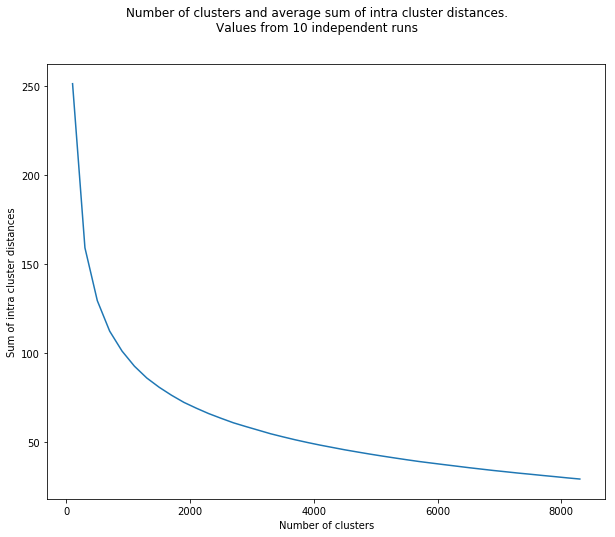

In [36]:
pylab.rcParams['figure.figsize'] = (10,8)
plt.suptitle('Number of clusters and average sum of intra cluster distances.\nValues from 10 independent runs')
plt.plot(nclusts8500, np.mean(dists8500, axis=1))
plt.xlabel('Number of clusters')
plt.ylabel('Sum of intra cluster distances')

## Plots for smaller number of clusters

In [39]:
def clustering_to_optims(x_orig, x_opt, clustering, opt):
    nclusts = []
    optims = []
    for nclust in sorted(clustering.keys()):
        nclusts.append(nclust)
        optim = []
        for seedn in clustering[nclust].keys():
            xtoc = clustering[nclust][seedn]['xtoc']
            dist = clustering[nclust][seedn]['dist']
            w = np.array([sum(xtoc == i) 
                          for i in range(nclust) 
                          if sum(xtoc==i) > 0])
            c_close = np.array([x_opt[np.argmin(dist[xtoc == i])] 
                                for i in range(nclust) 
                                if len(dist[xtoc == i]) > 0])
            prob = BorealWeightedProblem(c_close, weights=w)
            res = opt.solve(prob.model)
            optim.append(model_to_real_values(x_orig, prob.model, xtoc))
        optims.append(optim)
    return nclusts, optims

In [42]:
revenue, carbon, deadwood, ha = init_boreal()
n_revenue = nan_to_bau(revenue)
n_carbon= nan_to_bau(carbon)
n_deadwood = nan_to_bau(deadwood)
n_ha = nan_to_bau(ha)
ide = ideal(False)
nad = nadir(False)
opt = SolverFactory('cplex')

In [55]:
revenue_norm = normalize(n_revenue.values)
carbon_norm = normalize(n_carbon.values)
deadwood_norm = normalize(n_deadwood.values)
ha_norm = normalize(n_ha.values)

In [72]:
    x_orig = n_revenue.values
    x_opt = revenue_norm
    optims = dict()
    for nclust in sorted(clustering.keys()):
        n_optims = dict()
        for seedn in clustering[nclust].keys():
            xtoc = np.array(clustering[nclust][seedn]['xtoc']
            dist = np.array/clustering[nclust][seedn]['dist']
            w = np.array([sum(xtoc == i)
                          for i in range(eval(nclust))
                          if sum(xtoc == i) > 0])
            c_close = np.array([x_opt[np.argmin(dist[xtoc == i])]
                                for i in range(eval(nclust))
                                if len(dist[xtoc == i]) > 0])
            prob = BorealWeightedProblem(c_close, weights=w)
            res = opt.solve(prob.model)
            n_optims[seedn] = gu.model_to_real_values(x_orig,
                                                            prob.model,
                                                            xtoc)
            if logger:
                logger.info('Optimized {} clusters. Seed {}'.format(nclust,
                                                                    seedn))
            if starttime:
                logger.info('Since start {}s.'.format(time()-starttime))
        optims[nclust] = n_optims
        if logger:
            logger.info('Optimized {} clusters'.format(nclust))
        if starttime:
            logger.info('Since start {}s.'.format(time()-starttime))
        with open('optimizations/dump{}{}.json'.format(name,
                                                       nclust), 'w') as file:
            json.dump(n_optims, file)


Optimized 100 clusters. Seed 8
Since start 0.30295896530151367s.
Optimized 100 clusters. Seed 10
Since start 0.6036851406097412s.
Optimized 100 clusters. Seed 11
Since start 0.9252433776855469s.
Optimized 100 clusters. Seed 4
Since start 1.2423443794250488s.
Optimized 100 clusters. Seed 7
Since start 1.5384995937347412s.
Optimized 100 clusters. Seed 5
Since start 1.8512680530548096s.
Optimized 100 clusters. Seed 9
Since start 2.192352056503296s.
Optimized 100 clusters. Seed 2
Since start 2.4964847564697266s.
Optimized 100 clusters. Seed 3
Since start 2.789161443710327s.
Optimized 100 clusters. Seed 6
Since start 3.115241289138794s.
Optimized 100 clusters
Since start 3.115320920944214s.


NameError: name 'name' is not defined

In [67]:
n_datas = np.array([[n_revenue.values, n_carbon.values], [n_deadwood.values, n_ha.values]])
datas_norm = np.array([[revenue_norm, carbon_norm], [deadwood_norm, ha_norm]])
optims  = np.ones((2,2))
for i in range(np.shape(n_datas)[0]):
    for j in range(np.shape(n_datas)[1]):
        optims[i,j] = clustering_to_optims(n_datas[i,j], datas_norm[i,j], new_clustering8500, opt)

IndentationError: expected an indented block (<ipython-input-67-49bdfc693009>, line 3)